# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файл с данными и изучите общую информацию. 

In [1]:
# Загружаем нужные библиотеки для работы с данными а также сам датасет.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, date, time
pd.set_option('display.max_columns', None)
df = pd.read_csv('C:/Users/User/Desktop/проекты/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
# Выводим информацию о датасете.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Комментарии : Из предварительного вывода  данных видно что в 17 столбцах есть пропущенные значения. 
Также есть неккоректные названия столбцов в датафрейме(cityCenters_nearest, ponds_around3000, parks_around3000) которые требуется изменить. Требуется также изменить некоторые тип столбцов не более подходящие. 

### Предобработка данных

In [3]:
#Поменяем названия столбцов на корректные для дальнейшего удобства написания кода
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']

In [4]:
# Найдем в пропущенные значения в наших столбцах
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#Находим значения в стобце ceiling_height ошибочные значения влияющие на анализ
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [6]:
#Устраним  значения в стобце ceiling_height  с ошибочными значения влияющие на анализ
df['ceiling_height'] = (df['ceiling_height'].loc[df['ceiling_height']!=100].where(df['ceiling_height'] <= 20, 
(df['ceiling_height'] / 10)))

In [7]:
df['ceiling_height'].nunique()

176

Комментарии : В стобце ceiling_height были обнаружены аномальные значения.Скорее всего это ошибка в написании значения целого числа вместо вещественного. Таких значений было немного и мы решили их обработать.

In [8]:
#Обработаем пропущенные значения в столбцах а также добавим стобцы для последующего анализа
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
df.dropna(subset=['floors_total'])
df['coff_living_area'] = df['living_area'] / df['total_area']
df['living_area'] = df['living_area'].fillna(df['coff_living_area'].median() * df['total_area'])
df['coff_kitchen_area'] = df['kitchen_area'] / df['total_area']
df['kitchen_area'] = df['kitchen_area'].fillna(df['coff_kitchen_area'].median() * df['total_area'])

In [9]:
#Проверим информацию о нашем датасете после предработки данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Комментарий: Так как в некоторых столбцах обнаружены были пропуски мы заменили на число(0) и в одном случае в столбце 'ceiling_height на среднее значение. Также для устранения пропусков  столбцах living_area и kitchen_area мы рассчитали коэфф-т этих параметров к общей площади . После этого заменили пропущенные значениях этих параметров на медианные значения коэфф-в этих параметров умноженных на общую площадь.

In [10]:
#Посчитаем количество уникальных значений в столбце locality_name
len(df['locality_name'].dropna().unique())

364

In [11]:
#Устраним неявные дубликаты путем преобразования их названий
duplicates = ['городской посёлок', 'коттеджный посёлок','поселок городского типа', 
'поселок', 'посёлок городского типа', 'городской поселок', 'посёлок станции']
name = 'посёлок' 
df['locality_name'] = df['locality_name'].replace(duplicates, name, regex=True)

In [12]:
#Выведем названия уникальных значений с толбце locality_name
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [13]:
# Посчитаем количество уникальных значений в столбце locality_na после преобразования
len(df['locality_name'].dropna().unique())

322

 Комментарий :Устранили неявные дубликаты в столбце 'locality_name'. Количество уникальных значений в данном столбце стало меньше на 44 значения 

In [14]:
# В столбце locality_name заменили пропущеныне значения на Санкт-Петербург добавив условие 
df.loc[df['city_centers_nearest'] < 18000, 'locality_name'].fillna('Санкт-Петербург')
df= df.dropna(subset=['locality_name']) 

In [15]:
# Перевели некторые столбцы датасета к правильному типу данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['is_apartment'] = df['is_apartment'].astype(bool)
df['balcony'] = df['balcony'].astype(int)

Комментарии : Данные изменены в 3 столбцах. 
В столбце first_day_exposition стоит дата исходя из этого тип был object мы поменяли на data.Количество комнат(floors_total) и балконов (balcony)поменяли на тип данны int так как количество комнат и балконов не может быть с число с остатком . И столбец апартаменты на булево значение . Так как там значения True или False

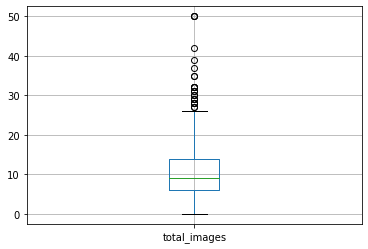

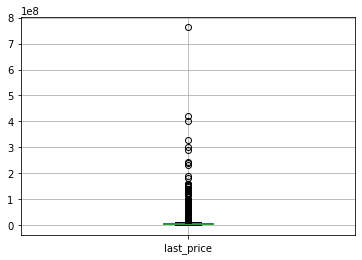

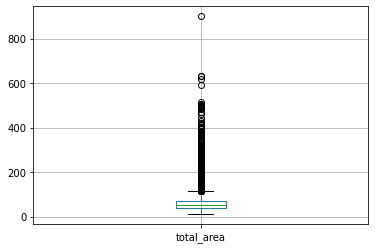

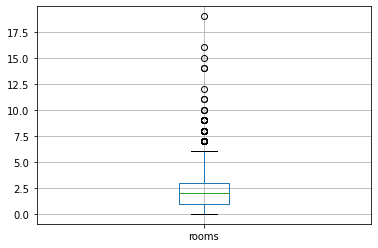

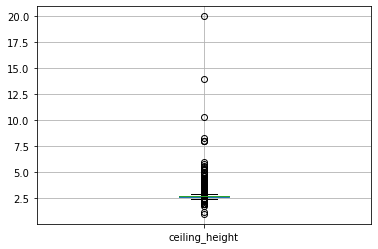

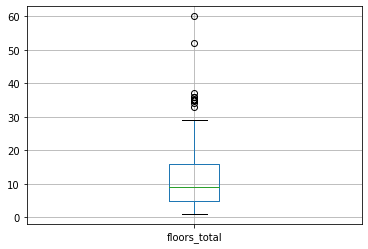

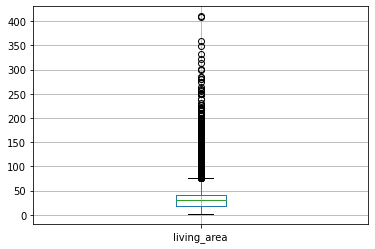

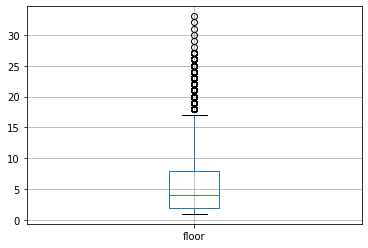

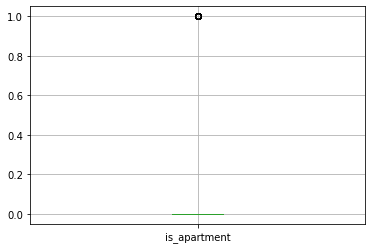

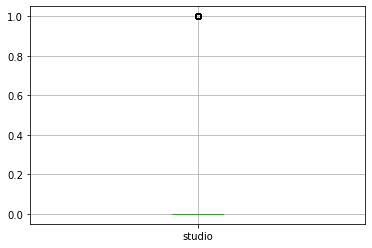

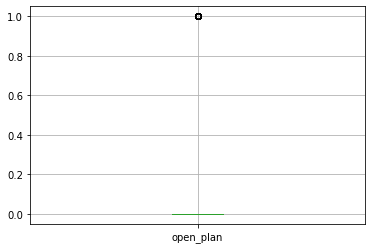

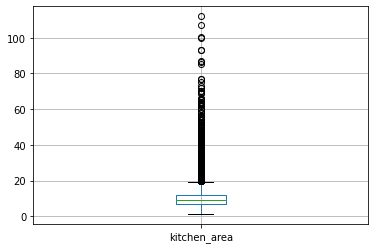

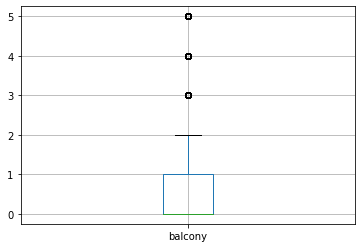

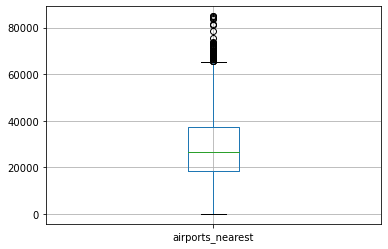

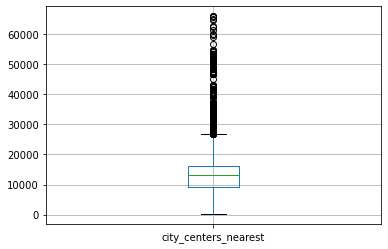

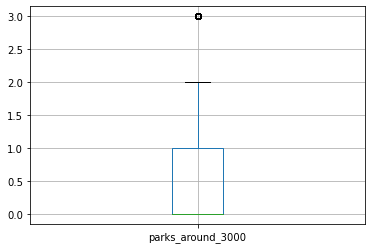

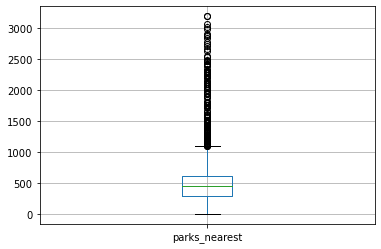

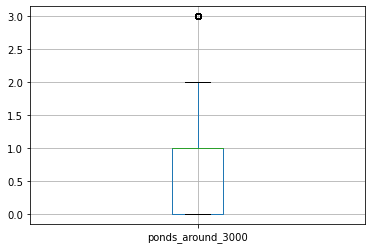

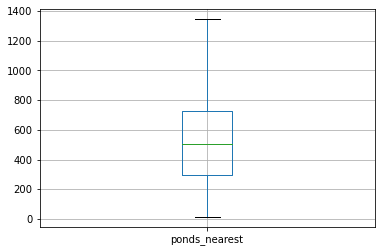

In [16]:
# Построим ящик с усами(боксплоты) для определения аномальных значений в столбцах 
columns_list = ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
        'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest']
for col in columns_list:
    df.boxplot(column=col, grid=True)
    plt.show()

Комментарии : Как видно из диаграммы размаха полученные по столбцам датафрейма . 
Можно утверждать что в столбцах (last_price,total_area,living_area,kitchen_area,airports_nearest,parks_nearest) имеются выбросы
которые могу сильно исказить данные при анализе.
И только у столбца  ponds_nearest нет выбросов.
    

In [17]:
# Построим статистические характеристики по каждым столбцам данных 
columns_list = ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
        'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest']
for col in columns_list:
    print(df[col].describe())
    

count    23650.000000
mean         9.862326
std          5.682278
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64
count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    23650.000000
mean         2.730193
std          0.270131
min          1.000000
25%          2.600000
50%          2.730348
75%          2.730348
max         2

Комментарий : Как можно заметить в некторых столбцах с данными мы имеем дело с аномальными значениями

In [18]:
# Устраним аномальные значения в столбцах
columns_list =  ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
          'kitchen_area', 'balcony',
        'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       ]
for column in columns_list:
    Q99 = df[column].quantile(0.99)
    df = df[(df[column] < Q99) | (df[column].isna())]

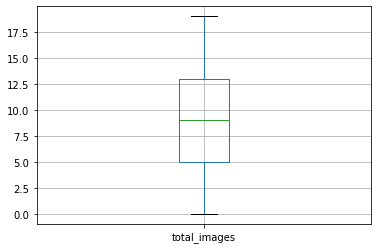

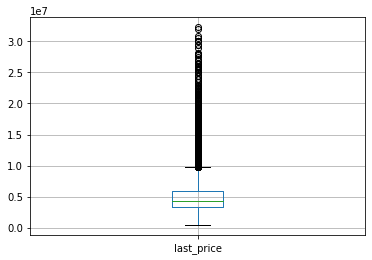

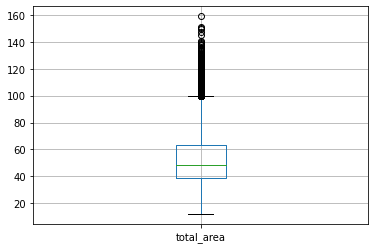

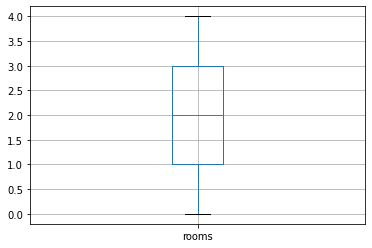

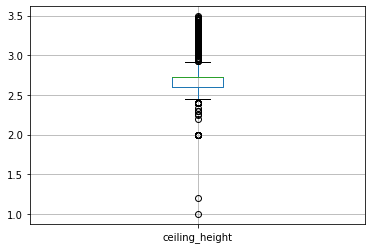

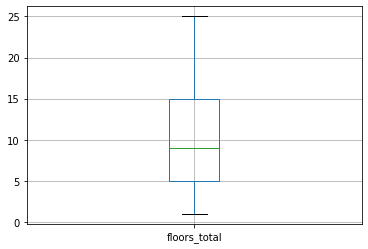

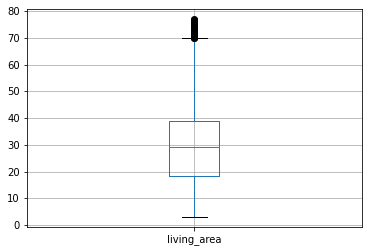

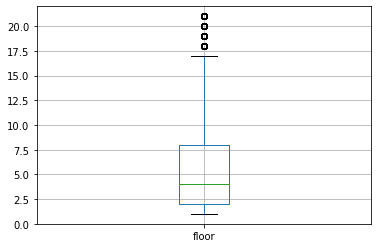

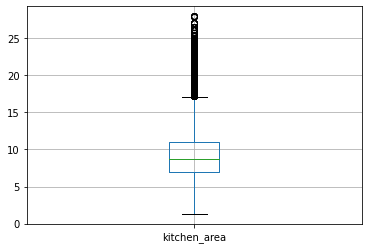

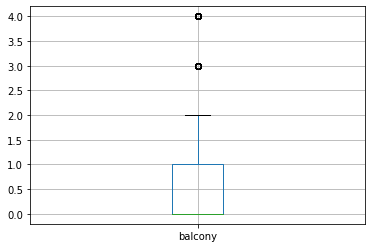

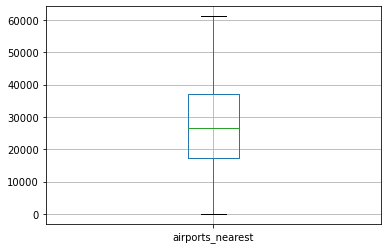

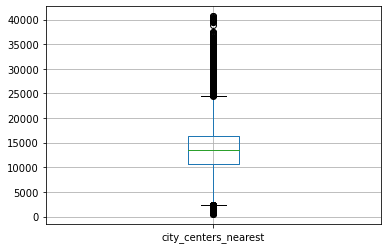

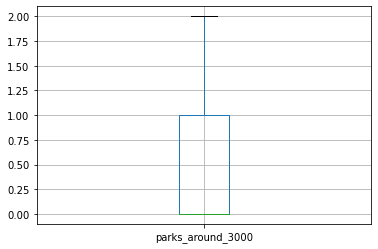

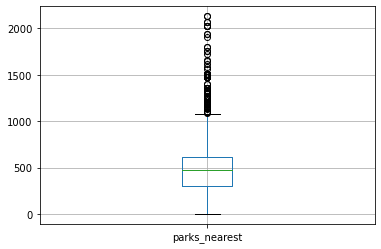

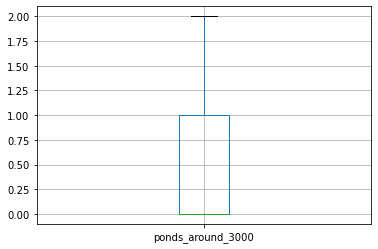

In [19]:
# Построим ящик с усами(боксплоты) после очистки от аномальных значений
columns_list = ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
          'kitchen_area', 'balcony',
        'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       ]
for col in columns_list:
    df.boxplot(column=col, grid=True)
    plt.show()

Комментарии: Избавились от хвостов в данных.

### Посчитаем  и добавим в таблицу новые столбцы для нашего анализа

In [20]:
# Добавим новый столбец price_m характеризующий цену за квадратный метр
df['price_m'] = df['last_price'] / df['total_area']/1000


In [21]:
# Добавим новый столбец weekday_exposition отобрающий день недели 
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['weekday_exposition'].value_counts()

1    3238
3    3228
2    3091
4    3074
0    2759
5    1501
6    1287
Name: weekday_exposition, dtype: int64

In [22]:
# Добавим новый столбец month_exposition отобрающий месяц
df['month_exposition'] = df['first_day_exposition'].dt.month 
df['month_exposition'].value_counts()

2     2034
3     1958
4     1808
11    1801
10    1662
9     1515
6     1371
8     1322
7     1275
12    1274
1     1168
5      990
Name: month_exposition, dtype: int64

In [23]:
# Добавим новый столбец year_exposition отобрающий год
df['year_exposition'] = df['first_day_exposition'].dt.year
df['year_exposition'].value_counts()

2018    6565
2017    6344
2019    2180
2016    2165
2015     846
2014      78
Name: year_exposition, dtype: int64

In [24]:
# Добавим новый столбец floor_type в котором будут только 3 значения  этажей
df['floor_type'] = ['other']*len(df)
df.loc[df['floor'] == 1, 'floor_type'] = 'first'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'last'
df['floor_type'].value_counts()

other    13395
last      2459
first     2324
Name: floor_type, dtype: int64

In [25]:
df.insert(18, 'city_centers_nearest_km', round((df['city_centers_nearest'] / 1000),0), False)

### Проведите исследовательский анализ данных

<AxesSubplot:ylabel='Frequency'>

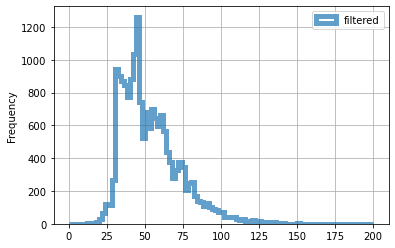

In [26]:
# Построим график распределения общей площади квартир
df.plot(kind='hist', y = 'total_area', histtype='step', range=(0, 200), bins=100, linewidth=5, alpha=0.7, label='filtered', grid=True,
    legend=True)

Комментарии  : Как показано на графике большая часть объявлений составляет с площадью от 30 до 60 кв.м. Пик приходится в районе 40-45 кв.м

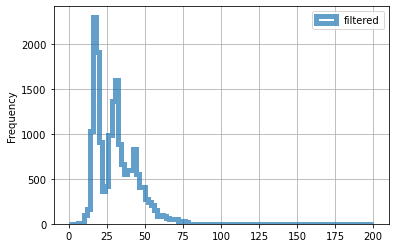

In [27]:
# Построим график распределения жилой площади квартир
df.plot(kind='hist', y = 'living_area', histtype='step', range=(0, 200), bins=100, linewidth=5, alpha=0.7, label='filtered', grid=True,
    legend=True);

Комментарии  : Как показано на графике он меньше похож на нормальное распределение как на предыдущем график . Так возрастает график примерно на значении 15 кв.м(также вляется его пиковым значением). Дальше идет спад. И с площадью  30 кв.м опять увеличивается количество объявлений и ближе к значению 50 кв.м начинает спадать 

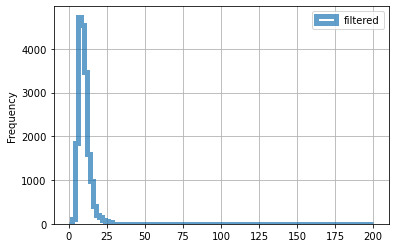

In [28]:
# Построим график распределения  площади кухни в  квартирах
df.plot(kind='hist', y = 'kitchen_area', histtype='step', range=(0, 200), bins=100, linewidth=5, alpha=0.7, label='filtered', grid=True,
    legend=True);

Комментарии  : Из гистограммы видно что большинство объявлений с размером кухни составляет от 5 до 20 кв.м . Пиковым значением можно считать 15 кв.м

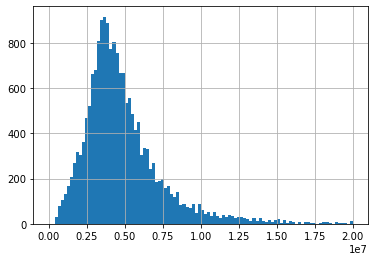

In [60]:
# Построим ценовой  график распределения  квартир 
df['last_price'].hist(bins=100, range=(0,2e+07));

In [30]:
df['last_price'].describe()

count    1.817800e+04
mean     4.927006e+06
std      2.889492e+06
min      4.300000e+05
25%      3.250000e+06
50%      4.300000e+06
75%      5.850000e+06
max      3.226000e+07
Name: last_price, dtype: float64

Комментарии  : Как видно из гистограммы по цене имеет нормальное распредление . Большинство значений приходтся от 2 500 000млн до 7 000 000 млн

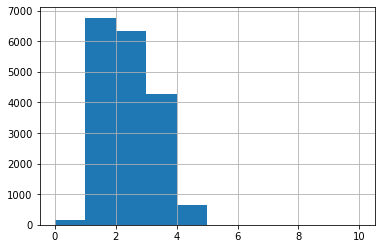

In [31]:
# Построим гистограмму распределния комнат в квартирах
df['rooms'].hist(bins=10, range=(0,10));

Комментарии студента : Как видно из гистограммы Большинство предложений приходтся на 1, 2, 3 числом комнат .

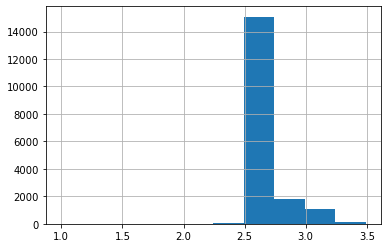

In [32]:
# Построим гистограмму распределния высоты потолка в квартирах
df['ceiling_height'].hist(bins=10);

In [33]:
df['ceiling_height'].describe()

count    18178.000000
mean         2.692197
std          0.150099
min          1.000000
25%          2.600000
50%          2.730348
75%          2.730348
max          3.490000
Name: ceiling_height, dtype: float64

Комментарии  : В среднем в большинстве количестве объявлений преобладает высота потолка от 2.5м
    

<AxesSubplot:>

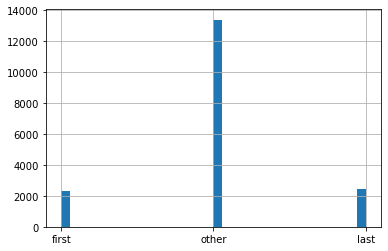

In [34]:
# Построим гистограмму распределния этажей в квартирах
df['floor_type'].hist(bins=36)

Комментарий  : Больше всего объявлений попадают не на первый и последний этажи, что в целом логично.
Общее количество этажей в доме

<AxesSubplot:>

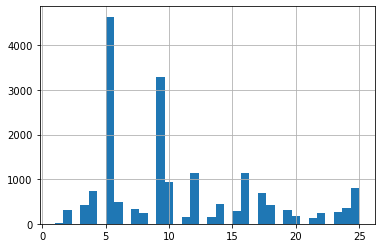

In [35]:
# Построим гистограмму распределния количества этажей в квартирах
df['floors_total'].hist(bins=36)

Комментарии  : Больше всего объявлений из 5-ти этажек, дальше идут 10-ти этажные дома.

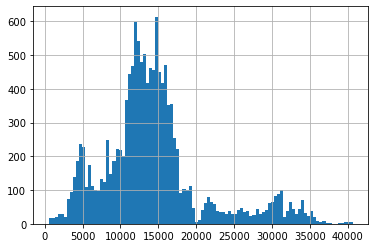

In [36]:
# Построим гистограмму распределния расстояния до центра города 
df['city_centers_nearest'].hist(bins=100);

Комментарий  : Как видно из графика большинство объявлений связанны с расстояним до центра города в радиусе начиная от 11 до 18 ка.

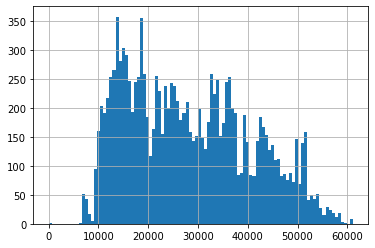

In [37]:
# Построим гистограмму распределния расстояния до ближайшего аэропорта
df['airports_nearest'].hist(bins=100);

Комментарий  :Больше всего объявлений на расстоянии от 15 до 40 км.
Расстояние до ближайшего аэропорта.

<AxesSubplot:>

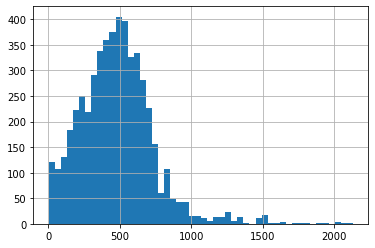

In [38]:
# Построим гистограмму распределния расстояния до ближайшего парка
df['parks_nearest'].hist(bins=50)

In [39]:
df['parks_nearest'].describe()

count    5191.000000
mean      480.136390
std       261.879077
min         1.000000
25%       307.000000
50%       470.000000
75%       620.000000
max      2131.000000
Name: parks_nearest, dtype: float64

Комментарий : Из графика распределения мы видим что в большинстве объявлениий  расстояние до ближайщего парка  составялет от 400 до 600 метров . Пик объявлений приходится на расстояние 500 метров 

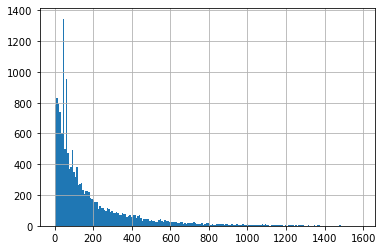

In [40]:
# Построим гистограмму распределния количества дней показа объявления
df['days_exposition'].hist(bins=200);

In [41]:
df['days_exposition'].describe()

count    15987.000000
mean       172.017514
std        210.456531
min          1.000000
25%         44.000000
50%         90.000000
75%        217.500000
max       1580.000000
Name: days_exposition, dtype: float64

Комментарий : Средний срок продажи квартир в районе 172 дней, т.е. около 6 - х месяцев, но если посмотреть на медианное значение то оно составляет всего лишь примерно 90 дней. В данном примере медиана более информативна нежели среднее 

<AxesSubplot:>

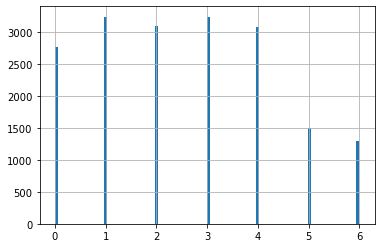

In [42]:
# Построим гистограмму распределния по  дням  показа объявления
df['weekday_exposition'].hist(bins=100)

Комментарий студента : Как видно из гистограммы частот больше всего объявлений на день недели (вторник, среда, четверг)

<AxesSubplot:>

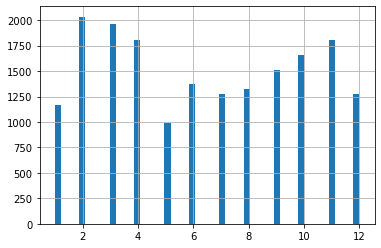

In [43]:
# Построим гистограмму распределния по  месяцу  показа объявления
df['month_exposition'].hist(bins=50)

Комментарий студента : Как видно из гистограммы частот большинстов объявлений приходится на (2,3,4)месяца

<AxesSubplot:>

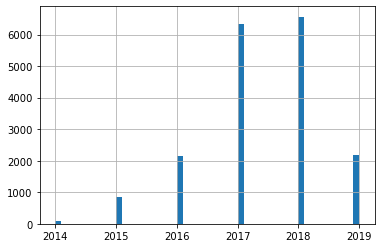

In [44]:
# Построим гистограмму распределния по  году  показа объявления
df['year_exposition'].hist(bins=50)

Комментарий студента : Как видно из гистограммы частот большинство объявлений приходится на 2017 и 2018 года

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

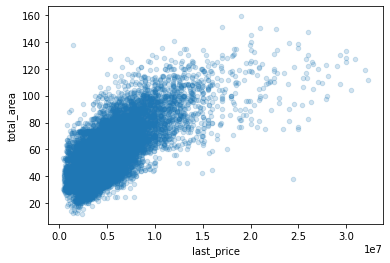

In [45]:
# Построим график  рассеяния общей площади относительно цены 
df.plot(x='last_price', y='total_area', kind ='scatter', alpha=0.2)

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

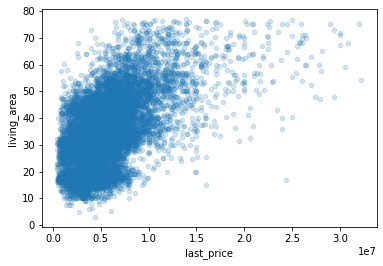

In [46]:
# Построим график  рассеяния жилой площади относительно цены 
df.plot(x='last_price', y='living_area', kind ='scatter', alpha=0.2)

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

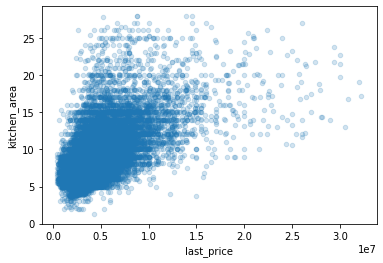

In [47]:
# Построим график  рассеяния  площади кухни относительно цены 
df.plot(x='last_price', y='kitchen_area', kind ='scatter', alpha=0.2)

In [48]:
# Найдем коэффицент корреляции между ценой и общей площадью
df['last_price'].corr(df['total_area'])

0.7215063133682527

In [49]:
# Найдем коэффицент корреляции между ценой и  площадью кухни
df['last_price'].corr(df['kitchen_area'])

0.550755121351962

In [50]:
# Найдем коэффицент корреляции между ценой и общей площадью
df['last_price'].corr(df['living_area'])

0.5995819565866555

Комментарии  : Как видно из диаграммы рассеяния и вычисления коэффицента корреляции наибольшая связь цены объекта наблюдается с общей площадью значение (0.65). Остальные два параментра таких как жилая площадь и площадь кухни коррелирует меньше с общей ценой объекта 

<AxesSubplot:xlabel='rooms'>

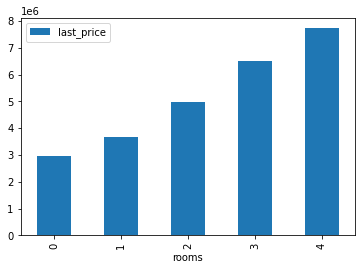

In [51]:
# Построим  столбчатую диаграмму на основании сводной таблицы где на оси х у нас будет цена квартиры  исходя из количества комнат
df.pivot_table(index='rooms', values='last_price').plot(y='last_price', kind ='bar')

Комментарии  : С увеличением количеством комнат увеличивается и цена

<AxesSubplot:xlabel='floor_type'>

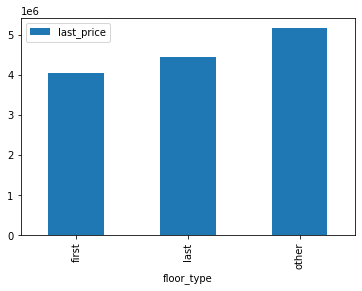

In [52]:
# Построим  столбчатую диаграмму на основании сводной таблицы где на оси х у нас будет цена квартиры  исходя из этажа в квартире
df.pivot_table(index='floor_type', values='last_price').plot(y='last_price', kind ='bar')

Комментарии  : У первого и последнего этажа цена ниже чем у остальных

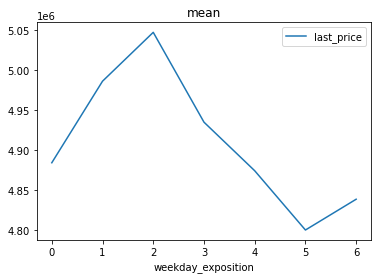

In [53]:
# Построим линейный график на основании сводной таблицы где на оси х у нас будет цена квартиры  исходя из дня публицкации объявления
df.pivot_table(index='weekday_exposition', values='last_price', 
aggfunc='mean').plot(y='last_price', kind ='line', title='mean');

Комментарии  : Из графика видно что цена объявлений выше когда публикуется в среду и опускается после среды

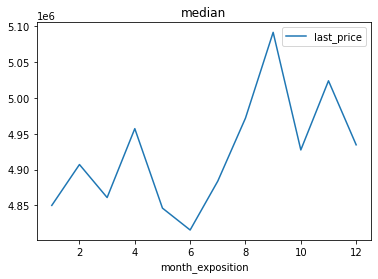

In [54]:
# Построим линейный график на основании сводной таблицы где на оси х у нас будет цена квартиры  исходя из месяца публицкации объявления
df.pivot_table(index='month_exposition', values='last_price', 
aggfunc='mean').plot(y='last_price', kind ='line', title='median');

Комментарий  : Высокие цены мы наблюдаем в объявлениях сентября и ноября 

<AxesSubplot:title={'center':'mean'}, xlabel='year_exposition'>

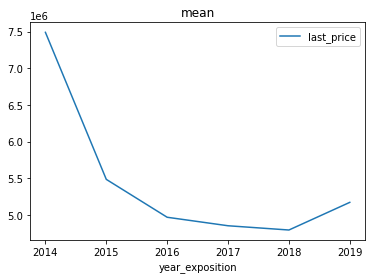

In [61]:
# Построим линейный график на основании сводной таблицы где на оси х у нас будет цена квартиры  исходя из года публицкации объявления
df.pivot_table(index='year_exposition', values='last_price', 
aggfunc='mean').plot(y='last_price', kind ='line', title='mean')

Комментарий  : Самое пиковое значение цены мы наблюдаем в 2014 году. Дальше идет спад вплоть до 2018

In [56]:
# Отберем топ 10 населенных пунктов по количеству объявлений
top_10 = df['locality_name'].value_counts().index[0:10]

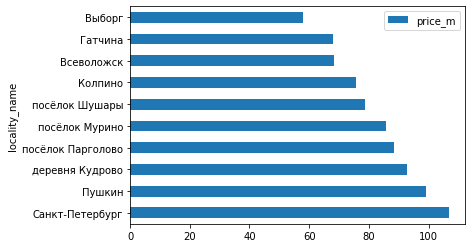

In [57]:
# Построим гистограмму с вертикальной ориентацией столбцов ценового ориентира  квадратного метра в населенных пунктах топ 10 
df.query('locality_name in @top_10').pivot_table(index='locality_name', values='price_m', 
aggfunc='mean').sort_values(by='price_m',ascending=False).plot(kind='barh');

Комментарии  : Среди 10 населённых пунктов с наибольшим числом объявлений самая высока цена за 
кв.м. в Санкт-Петербурге, самая низкая в Выборге.

In [58]:
# Оберем объявления где населенный пункт Санкт-Петербург
SPB = df[df['locality_name'] == 'Санкт-Петербург']

<AxesSubplot:xlabel='city_centers_nearest_km'>

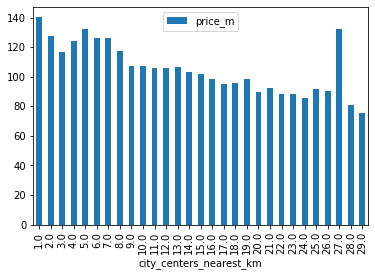

In [59]:
# Построим стобцатую диаграмму  ценового ориентира квадратного метра в зависимости от расстояния до центра в Санкт Петербурге
SPB.pivot_table(index='city_centers_nearest_km', values='price_m', 
aggfunc='mean').plot(kind='bar')

Комментарий  : Как видно из гистограммы частот чем ближе к центру тем соотвественно цена выше это логично . Дальше от центра цена убывает 

### Общий вывод

Был проанализирован датасет объявлений о продаже недвижимости в Санкт-Петербурге и 
окрестностях за период с конца 2014-го по середину 2019-го года. Основное количество 
объявлений на рынке недвижимости предлагает объекты площадью от 30 до 60 кв.м. 
Большинство планировок имеет высоту потолков 2.5 м. свыше 1000 объявлений 
Больше всего объявлений 
попадают не на первый и последний этажи, но, несмотря на данный факт, цена на 
последние этажи самая высокая. Больше всего объявлений в 5-ти этажных домах, дальше 
идут 10-ти этажные дома. Цена объекта связана с общей площадью. 
Больше всего объявлений предполагает квартиры с 1,2,3 комнатами
. Основное кол-во объявлений по недорогим объектам, чем цена выше, 
тем объявлений меньше. Чаще всего объявления выкладывают в будние дни в равных 
пропорциях. По месяцам заметен спад в декабре-январе и с мая по август. Наиболее 
популярный месяц - февраль и март. По году - пик размещения объявления приходится на 
2017-2018 год. Интересно, что цена выше, если объявления публикуют в четверг. 
Следующий пик заметен в субботу. Самая высокие цены наблюдаются при публикациях в 
апреле, июле и стабильный рост от октября до конца декабря. По году заметно снижении 
цены до 2018 года, видимо, это связано с эконмичсекой ситуацией. После 18 года цена 
начинает немного расти. Чем ближе к центру, тем цена выше. Также стоит отметить 
всплеск цены в районе 27 км. - видимо, это район с элитной недвижимостью в курортных 
поселках. Также в ходе исследования мы выявили корреляцию цены по отношению к общей площади, жилой площади и площади кухни. В ходе исследования привышли к выводу что цена больше коррелирует с общей площадью нежели с другими 2 параментрами (жилой площади и площади кухни) отсюда можно сделать вывод о том что цена в большей степени зависит именно от общей площади обхекта. Отдельно стоит проработать гипотезы об изменении цены в разных дня , месяцах. 
